> ## Formulación del problema.

#### El precio de los telefonos celulares dependen de varios factores como la resolución, la marca, el tamaño, peso, la calidad de la imagen, la memoria RAM, la bateria y el poder del cpu. En este dataset, se busca estimar el precio de los celulares usando los factores anteriormente nombrados.

> ## Recolección de datos 

#### Link dataset: https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-prediction/Cellphone.csv
/kaggle/input/mobile-price-prediction/Cellphone.xlsx


> ## Exploración de datos.

In [2]:
data = pd.read_csv("/kaggle/input/mobile-price-prediction/Cellphone.csv")
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.shape

(161, 14)

In [4]:
data.columns.values

array(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam',
       'Front_Cam', 'battery', 'thickness'], dtype=object)

In [5]:
data.dtypes

Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

In [6]:
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [9]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


### Descripción del dataset
* #### Contiene 161 filas y 14 columnas/variables, una de esas variables es la dependiente.
* #### Las 14 variables son númericas.
* #### No contiene valores nulos ni filas duplicadas

#### Variable dependiente (Price)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

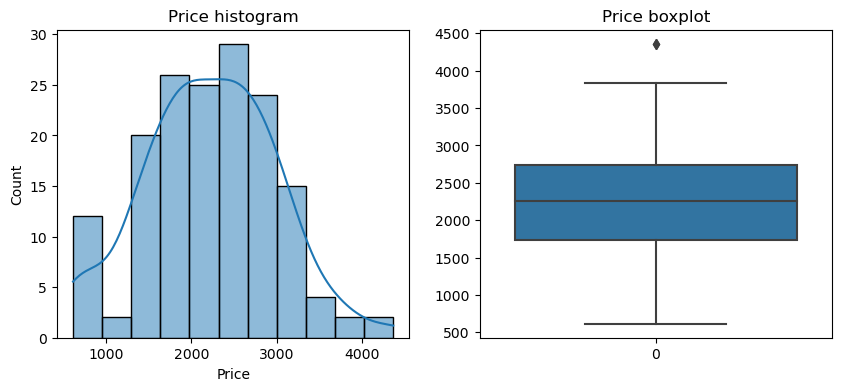

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data["Price"], kde=True)
plt.title("Price histogram")

plt.subplot(1,2,2)
sns.boxplot(data["Price"])
plt.title("Price boxplot")

plt.show()

In [12]:
data["Price"].describe()

count     161.000000
mean     2215.596273
std       768.187171
min       614.000000
25%      1734.000000
50%      2258.000000
75%      2744.000000
max      4361.000000
Name: Price, dtype: float64

### Descripción variable dependiente
* #### El precio presenta una distribución simetrica.
* #### La media del precio de una celular es de 2215.
* #### El 75% de los precios es menor a 2750. El 15% restante estan entre los 2750 y 4350.

### Variables independientes

In [13]:
data.sort_values("Product_id")

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
29,10,1950,26,118.0,5.0,187,4,1.300,8.0,1.000,8.0,2.0,2000,6.4
71,14,2276,91,116.0,5.0,294,8,1.500,16.0,2.000,13.0,5.0,2300,7.8
75,14,2276,98,116.0,5.0,294,8,1.500,16.0,2.000,13.0,5.0,2300,7.8
112,30,2975,307,149.0,5.5,534,8,1.600,32.0,3.000,16.0,8.0,3000,7.0
111,30,2975,302,149.0,5.5,534,8,1.600,32.0,3.000,16.0,8.0,3000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1296,3211,8946,170.0,5.5,534,4,1.975,128.0,6.000,20.0,8.0,3400,7.9
122,1327,2001,393,194.8,5.7,258,4,1.200,16.0,2.000,8.0,1.0,3400,10.2
123,1327,2001,399,194.8,5.7,258,4,1.200,16.0,2.000,8.0,1.0,3400,10.2
46,1339,1421,40,120.0,4.0,233,2,1.000,4.0,0.512,2.0,0.0,1200,9.8


* #### La columna product_id no es una columna relevante para el modelo.

In [14]:
data.drop(["Product_id"], axis=1, inplace=True)

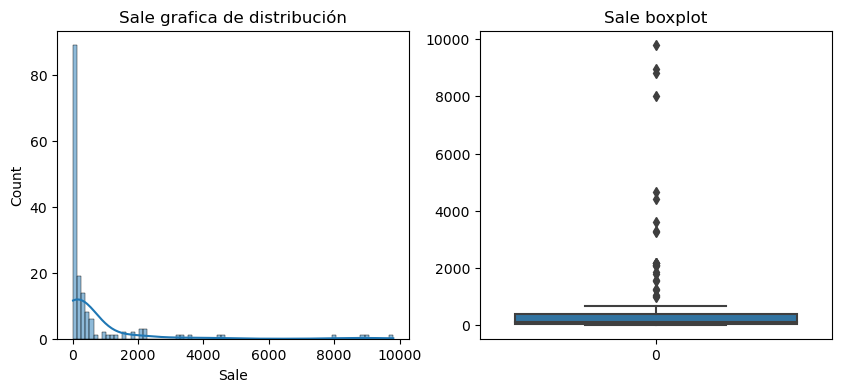

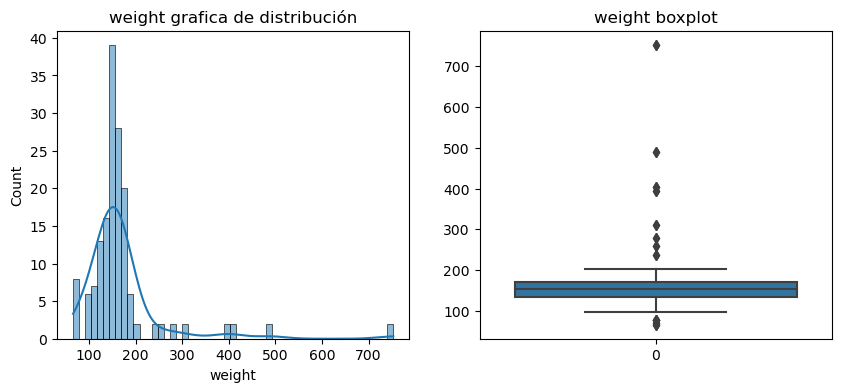

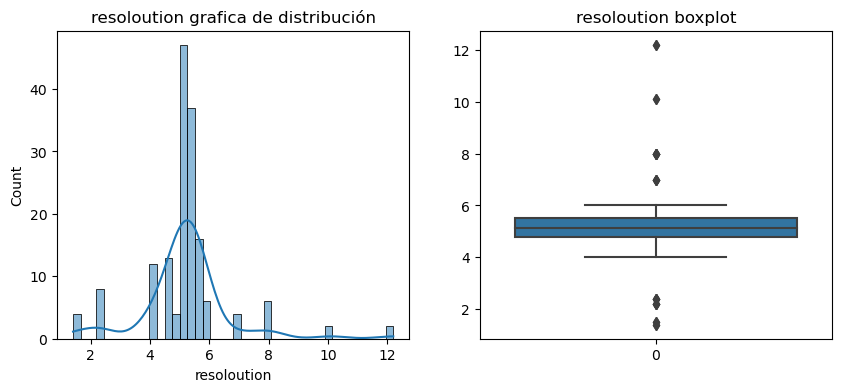

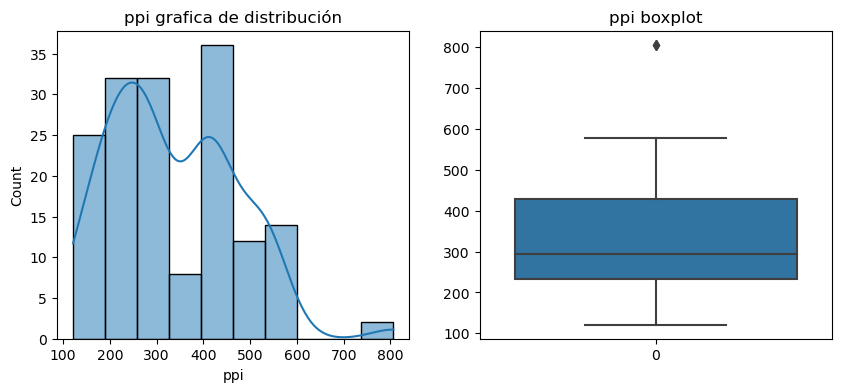

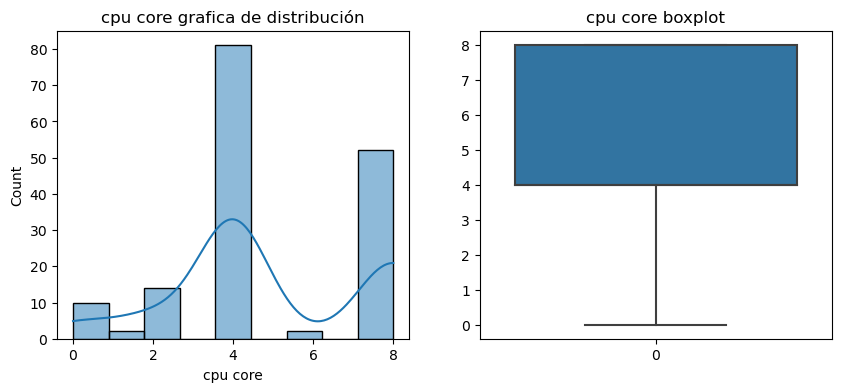

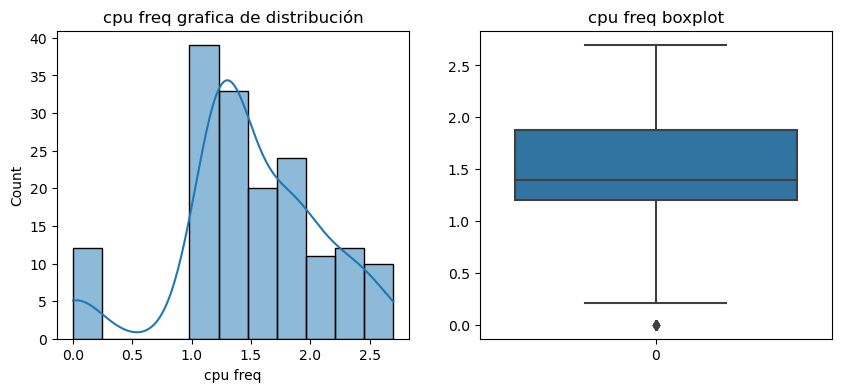

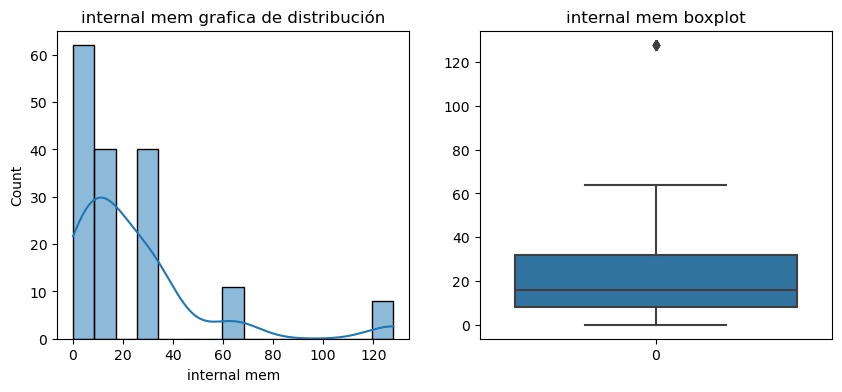

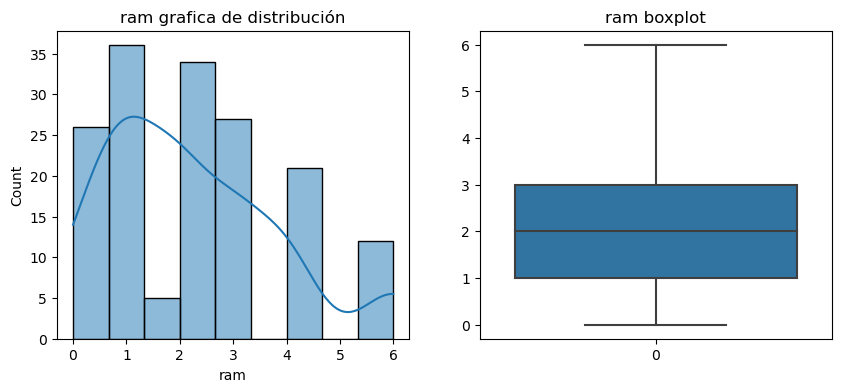

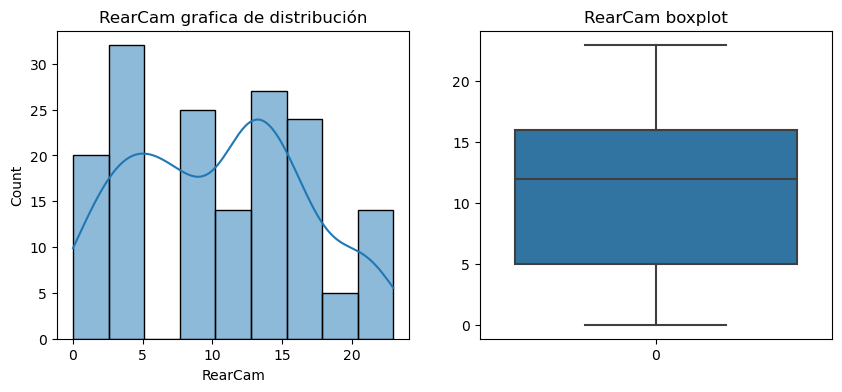

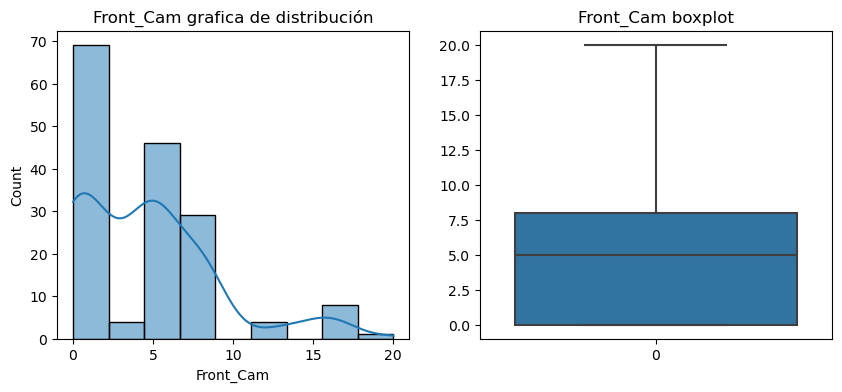

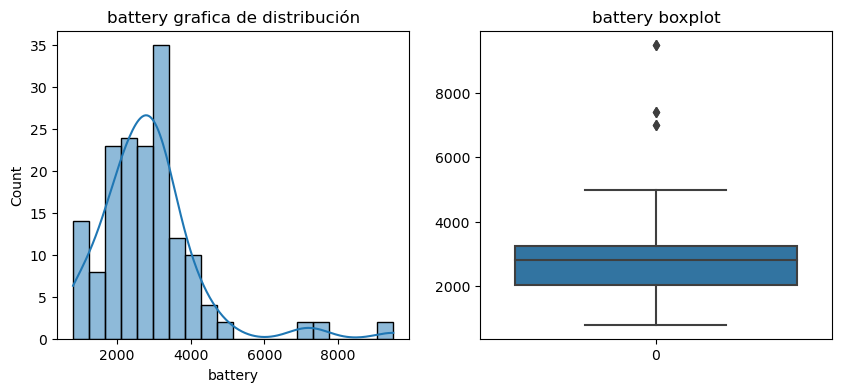

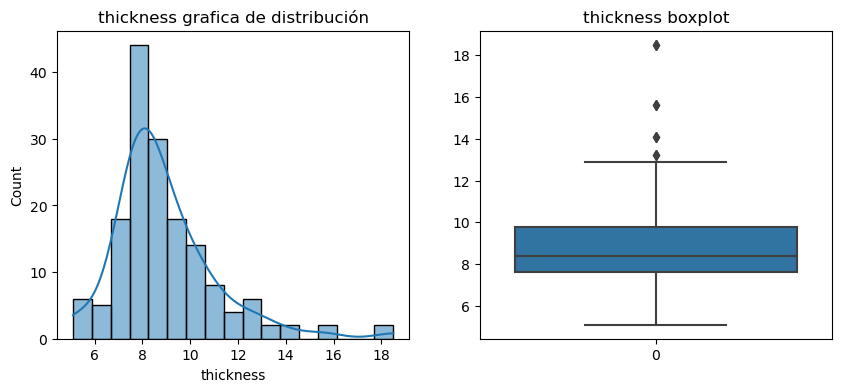

In [15]:
for col in data.columns.drop("Price"):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(col+" grafica de distribución")
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(col+" boxplot")
    
    plt.show()

In [16]:
for col in data.columns.drop("Price"):
    print(data[col].describe())
    print()

count     161.000000
mean      621.465839
std      1546.618517
min        10.000000
25%        37.000000
50%       106.000000
75%       382.000000
max      9807.000000
Name: Sale, dtype: float64

count    161.000000
mean     170.426087
std       92.888612
min       66.000000
25%      134.100000
50%      153.000000
75%      170.000000
max      753.000000
Name: weight, dtype: float64

count    161.000000
mean       5.209938
std        1.509953
min        1.400000
25%        4.800000
50%        5.150000
75%        5.500000
max       12.200000
Name: resoloution, dtype: float64

count    161.000000
mean     335.055901
std      134.826659
min      121.000000
25%      233.000000
50%      294.000000
75%      428.000000
max      806.000000
Name: ppi, dtype: float64

count    161.000000
mean       4.857143
std        2.444016
min        0.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cpu core, dtype: float64

count    161.000000
mean       1.502832


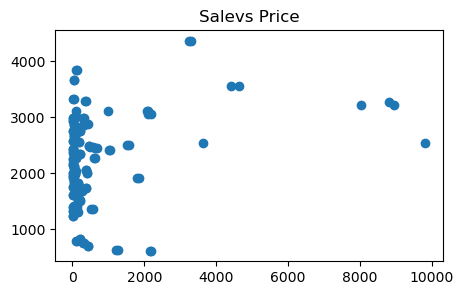

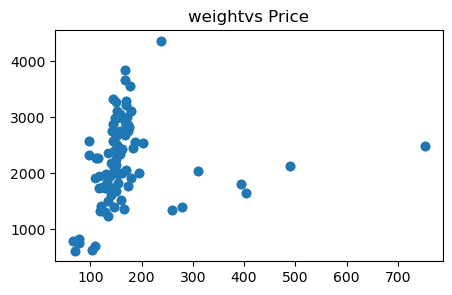

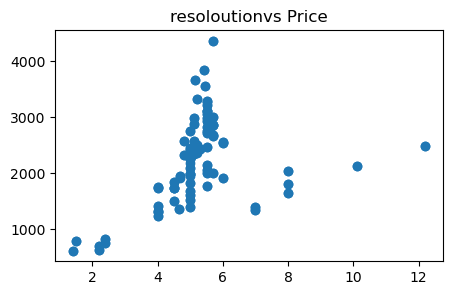

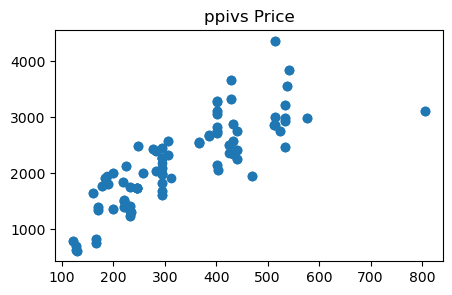

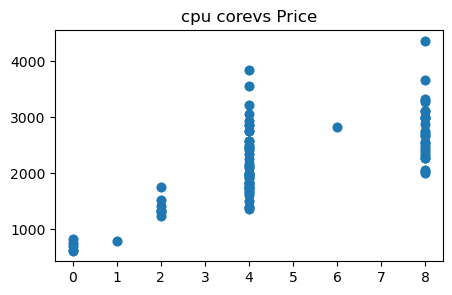

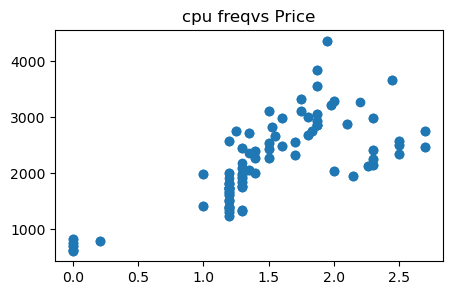

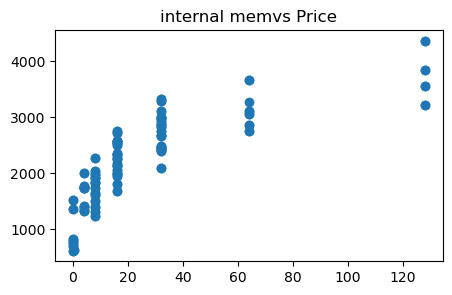

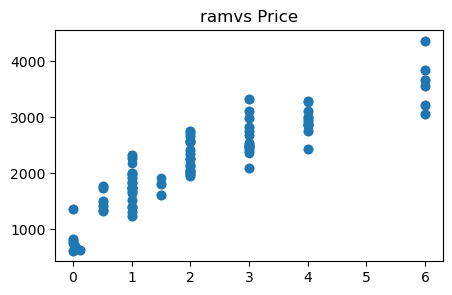

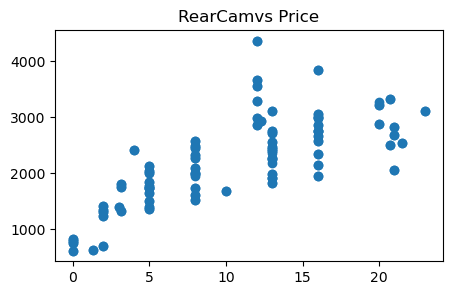

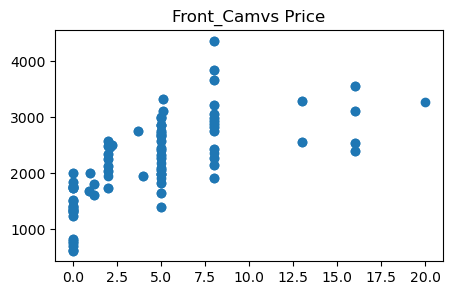

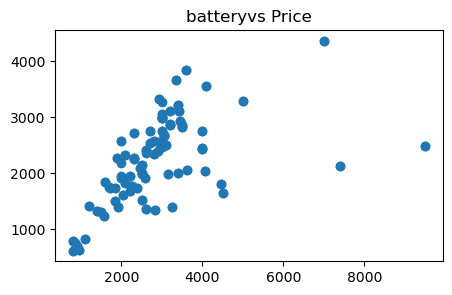

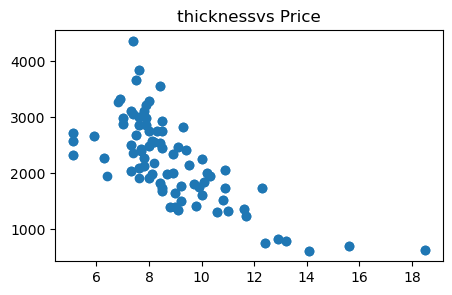

In [17]:
for col in data.columns.drop("Price"):
    plt.figure(figsize=(5,3))
    
    plt.scatter(data[col], data["Price"])
    plt.title(col+"vs Price")
    
    plt.show()

In [18]:
data.corr()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
RearCam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


### Preprocesado de datos

* #### Chequear las multicolinealidades

In [19]:
X = data[data.columns.drop("Price")]
Y = data["Price"]

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
vif_data

,feature,VIF
0,Price,141.356690
1,Sale,2.076314
2,weight,77.101779
3,resoloution,140.747520
4,ppi,38.531466
5,cpu core,18.603643
6,cpu freq,28.305525
7,internal mem,13.358075
8,ram,28.759865
9,RearCam,14.543297


In [21]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR  

In [22]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X,Y)

In [23]:
vif_df = pd.DataFrame(list(zip(data.columns, selector.support_, selector.ranking_)))
vif_df

,0,1,2
0,Price,False,5
1,Sale,False,3
2,weight,True,1
3,resoloution,False,2
4,ppi,True,1
5,cpu core,True,1
6,cpu freq,True,1
7,internal mem,True,1
8,ram,True,1
9,RearCam,True,1


### Descripción de selección de rasgos.
* #### Observamos que la variable resolutions tiene un alto grado de colinealidad. Por lo que no la vamos a tener en cuenta en el modelo.
* #### Mirar también en la selección de rasgos recursiva que reducimos a 8 variables únicamente para incluir en el modelo y que las variables sale, resolution, y front_cam no tienen influencia en el modelo.


In [24]:
vif_df[vif_df[1]==True][0]

2           weight
4              ppi
5         cpu core
6         cpu freq
7     internal mem
8              ram
9          RearCam
11         battery
Name: 0, dtype: object

In [25]:
X_new = data[vif_df[vif_df[1]==True][0]]
X_new.head()

,weight,ppi,cpu core,cpu freq,internal mem,ram,RearCam,battery
0,135.0,424,8,1.35,16.0,3.000,13.00,2610
1,125.0,233,2,1.30,4.0,1.000,3.15,1700
2,110.0,312,4,1.20,8.0,1.500,13.00,2000
3,118.5,233,2,1.30,4.0,0.512,3.15,1400
4,125.0,233,2,1.30,4.0,1.000,3.15,1700


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_new, Y,
                                            test_size=0.3,
                                            random_state=0)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.predict(x_test)

array([2892.11324074,  789.60397196, 1675.39528079, 2333.82681785,
       2962.72841424, 2477.09480525, 1939.86360333, 2902.60512861,
       1515.43584464,  871.80659957, 2115.50259598, 1752.04099385,
       1976.6212719 , 3264.92675896, 3658.25949018, 1312.814774  ,
       1312.814774  , 2453.97179719, 2819.62110384, 1521.63613896,
       2001.00343741, 3470.51178144, 1712.93912385, 1408.83123517,
       2209.80368608, 2626.50266159, 2992.46800229, 2902.60512861,
       1481.07604742, 1939.86360333, 2293.56460126, 2354.58054356,
       1809.3582268 , 2379.52855765, 1453.01289498, 1959.10843119,
       2819.62110384, 2343.47981581, 2618.92271557, 1598.16667247,
       2209.80368608, 3172.69650458, 2296.57283703, 4237.18888789,
       2892.11324074, 3264.92675896, 2438.3703926 , 2756.08947476,
       1598.16667247])

In [31]:
lr.score(x_test,y_test)

0.9253957423369201

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(LinearRegression(),
                        X_new, Y,
                        cv=10)
scores.mean()

0.8769924875634478

In [34]:
import statsmodels.formula.api as smf

In [35]:
data_new = pd.concat([X_new, Y],axis=1)
data_new.rename(columns={"cpu freq":"cpu_freq",
                        "cpu core": "cpu_core",
                        "internal mem":"internal_mem"},
                inplace=True)
data_new.head()

,weight,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,battery,Price
0,135.0,424,8,1.35,16.0,3.000,13.00,2610,2357
1,125.0,233,2,1.30,4.0,1.000,3.15,1700,1749
2,110.0,312,4,1.20,8.0,1.500,13.00,2000,1916
3,118.5,233,2,1.30,4.0,0.512,3.15,1400,1315
4,125.0,233,2,1.30,4.0,1.000,3.15,1700,1749


In [36]:
lm = smf.ols(formula="Price~"+("+").join(data_new.columns.drop("Price")),
            data=data_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     291.1
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.49e-88
Time:                        13:22:03   Log-Likelihood:                -1072.9
No. Observations:                 161   AIC:                             2164.
Df Residuals:                     152   BIC:                             2191.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      675.7520     57.198     11.814      0.000     562.746     788.758
weight          -1.5699      0.417     -3.761      0.000      -2.395      -0.745
ppi              0.9119      0.237      3.840      0.000       0.443       1.381
cpu_core        87.8163      8.974      9.785      0.000      70.086     105.547
cpu_freq       178.0435     41.620      4.278      0.000      95.815     260.273
internal_mem     6.1900      1.264      4.898      0.000       3.693       8.687
ram            111.9509     27.991      4.000      0.000      56.650     167.252
RearCam          3.5097      4.509      0.778      0.438      -5.399      12.419
battery          0.1312      0.034      3.890      0.000       0.065       0.198
==============================================================================
Omnibus:                        3.952   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                4.716
Skew:                           0.087   Prob(JB):                       0.0946
Kurtosis:                       3.820   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Quitamos a la variable RearCam porque tiene un alto p valor por lo que se acepta la hipotesis nula de que el coeficiente que acompaña a esta variable puede ser nula.

In [37]:
lm2 = smf.ols(formula="Price~"+("+").join(data_new.columns.drop(["Price","RearCam"])),
            data=data_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     333.4
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.20e-89
Time:                        13:22:03   Log-Likelihood:                -1073.2
No. Observations:                 161   AIC:                             2162.
Df Residuals:                     153   BIC:                             2187.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      669.3752     56.535     11.840      0.000     557.684     781.066
weight          -1.5924      0.416     -3.829      0.000      -2.414      -0.771
ppi              0.9911      0.214      4.625      0.000       0.568       1.415
cpu_core        90.2050      8.423     10.710      0.000      73.566     106.844
cpu_freq       180.0744     41.485      4.341      0.000      98.117     262.032
internal_mem     6.0142      1.242      4.843      0.000       3.561       8.467
ram            116.4675     27.347      4.259      0.000      62.440     170.495
battery          0.1311      0.034      3.893      0.000       0.065       0.198
==============================================================================
Omnibus:                        3.667   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.930
Skew:                           0.140   Prob(JB):                        0.140
Kurtosis:                       3.712   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_new.drop(["RearCam"], axis=1, inplace=True)
x_train,x_test,y_train,y_test = train_test_split(X_new, Y,
                                            test_size=0.3,
                                            random_state=0)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
lr2 = LinearRegression()
lr2.fit(x_train,y_train)

LinearRegression()

In [40]:
lr2.score(x_test,y_test)

0.9252753917766081

In [41]:
scores = cross_val_score(LinearRegression(),
                        X_new, Y,
                        cv=10)
scores.mean()

0.878191876315114

In [42]:
price_predict = lr2.predict(x_test)

In [43]:
SSD = sum((y_test - price_predict)**2)
SSD

1843704.0943207773

In [44]:
RSE = np.sqrt(SSD/(len(y_test)-len(x_test.columns)-1))
RSE

212.0575217822023

In [45]:
error = RSE/y_test.mean()
error

0.09280333822167364